In [43]:
import pandas as pd
import numpy as np

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [45]:
sessions = pd.read_csv('sessions.csv')
transactions = pd.read_csv('transactions.csv')
product_categories = pd.read_csv('product_categories.csv')

In [46]:
# Merge product category names into transactions
transactions = transactions.merge(product_categories,
                                  left_on='prod_category_id',
                                  right_on='Product Category ID',
                                  how='left')

In [47]:
# Merge transactions into sessions (behavior + demographics)
merged = sessions.merge(transactions,
                        on=['machine_id', 'site_session_id'],
                        how='left')


In [50]:
merged.head()

,machine_id,site_session_id,user_session_id,domain_id_x,ref_domain__name,pages_viewed,duration,event_date_x,event_time_x,hoh_most_education,...,event_time_y,domain_name_y,total_transactions_2020,total_transactions_2021,total_transactions_2022,total_transactions_2023,Product Category ID,Report Category,Item Category,Item Sub-Category
0,288084937,6729633401426801739,2412880849370001,1.058424e+19,NaN,14.0,14.0,2020-01-01,0:00:02,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288912140,1092751701181111355,2412889121400001,1.058424e+19,NaN,34.0,31.0,2020-01-01,0:00:02,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,1.001001e+09,"APPAREL, ACCESSORIES & JEWELRY",APPAREL,WOMEN
3,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,1.002004e+09,"APPAREL, ACCESSORIES & JEWELRY",JEWELRY,FASHION JEWELRY
4,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,0:01:03,amazon.com,69.0,NaN,NaN,NaN,4.005017e+09,OFFICE SUPPLIES & BUSINESS MACHINES,WORKPLACE SUPPLIES,JANITORIAL SUPPLIES


In [ ]:
# Clean up domain_name
merged = merged.rename(columns={'domain_name_x': 'domain_name'})
merged.drop(columns=['domain_name_y'], inplace=True)

In [54]:
merged.rename(columns={
    'event_date_x': 'session_event_date',
    'event_time_x': 'session_event_time',
    'event_date_y': 'transaction_event_date',
    'event_time_y': 'transaction_event_time',
}, inplace=True)

In [55]:
print(merged['Report Category'].isna().mean())

0.9523023647114806


In [56]:
purchases_per_user = merged.groupby('machine_id')['prod_totprice'].count().reset_index()

print(purchases_per_user['prod_totprice'].describe())

count    193557.000000
mean          3.476361
std          23.193531
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        7399.000000
Name: prod_totprice, dtype: float64


In [57]:
merged[merged['machine_id'] == 54388726].head(20)


,machine_id,site_session_id,user_session_id,domain_id_x,ref_domain__name,pages_viewed,duration,session_event_date,session_event_time,hoh_most_education,...,transaction_event_date,transaction_event_time,total_transactions_2020,total_transactions_2021,total_transactions_2022,total_transactions_2023,Product Category ID,Report Category,Item Category,Item Sub-Category
10310563,54388726,7742978211753533140,267543887260013,4.046670e+18,google.com,1.0,1.0,2022-03-11,20:40:53,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10621166,54388726,6690028203408553852,268543887260019,1.277397e+19,google.com,1.0,1.0,2022-04-26,14:53:16,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637121,54388726,7683833601767285509,268543887260022,1.058424e+19,google.com,1.0,1.0,2022-04-28,19:00:29,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10637346,54388726,969580489672672582,268543887260022,1.058424e+19,NaN,1.0,1.0,2022-04-28,19:33:10,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10733235,54388726,3045221371382056303,269543887260015,1.058424e+19,NaN,3.0,2.0,2022-05-13,13:30:05,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10752405,54388726,4468377741469936755,269543887260016,1.058424e+19,google.com,1.0,1.0,2022-05-16,13:50:00,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10753087,54388726,3518637012400180289,269543887260017,4.046670e+18,google.com,1.0,1.0,2022-05-16,15:33:23,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10818081,54388726,3477129858857749788,269543887260028,1.058424e+19,NaN,2.0,1.0,2022-05-26,15:02:24,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11531261,54388726,4081526687533470370,273543887260001,4.046670e+18,google.com,3.0,3.0,2022-09-09,13:21:31,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11531694,54388726,6956130965027157547,273543887260002,4.046670e+18,NaN,1.0,1.0,2022-09-09,14:39:54,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
merged
# currently we don't have anything, but we should later on find better ways to handle NaNs

,machine_id,site_session_id,user_session_id,domain_id_x,ref_domain__name,pages_viewed,duration,session_event_date,session_event_time,hoh_most_education,...,transaction_event_date,transaction_event_time,total_transactions_2020,total_transactions_2021,total_transactions_2022,total_transactions_2023,Product Category ID,Report Category,Item Category,Item Sub-Category
0,288084937,6729633401426801739,2412880849370001,1.058424e+19,NaN,14.0,14.0,2020-01-01,0:00:02,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288912140,1092751701181111355,2412889121400001,1.058424e+19,NaN,34.0,31.0,2020-01-01,0:00:02,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,2020-01-01,0:01:03,69.0,NaN,NaN,NaN,1.001001e+09,"APPAREL, ACCESSORIES & JEWELRY",APPAREL,WOMEN
3,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,2020-01-01,0:01:03,69.0,NaN,NaN,NaN,1.002004e+09,"APPAREL, ACCESSORIES & JEWELRY",JEWELRY,FASHION JEWELRY
4,285811167,7837313750729559995,2412858111670001,4.046670e+18,NaN,4.0,3.0,2020-01-01,0:00:02,2.0,...,2020-01-01,0:01:03,69.0,NaN,NaN,NaN,4.005017e+09,OFFICE SUPPLIES & BUSINESS MACHINES,WORKPLACE SUPPLIES,JANITORIAL SUPPLIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107382,311301658,2640888765140691712,2653113016580035,4.046670e+18,NaN,4.0,1.0,NaN,NaN,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14107383,318185954,712868840266094016,2653181859540054,4.046670e+18,imdb.com,43.0,62.0,NaN,NaN,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14107384,322449434,5983590363902492002,2683224494340041,4.046670e+18,NaN,5.0,1.0,NaN,NaN,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14107385,311314506,4677707501469914285,2833113145060027,4.046670e+18,NaN,2.0,0.0,NaN,NaN,-88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create income group labels
def income_group(income):
    if income <= 13:
        return 'Low Income'
    if income >= 16:
        return 'High Income'
    return 'Middle Income'

merged['income_group'] = merged['household_income'].apply(income_group)

# Feature Engineering per user (machine_id)
behavior = merged.groupby('machine_id').agg({
    'pages_viewed': 'mean',
    'duration': 'mean',
    'Item Category': pd.Series.nunique,  # Unique categories viewed
    'site_session_id': pd.Series.nunique,  # Total sessions
    'domain_name': pd.Series.nunique,      # Sites visited
    'income_group': 'first',
    'household_income': 'first'
}).reset_index()

behavior.rename(columns={
    'pages_viewed': 'avg_pages_viewed',
    'duration': 'avg_duration',
    'Item Category': 'unique_categories_viewed',
    'site_session_id': 'total_sessions',
    'domain_name': 'unique_domains_visited'
}, inplace=True)

In [63]:
# Calculate Entropy of category viewing per machine_id
from scipy.stats import entropy

def calc_entropy(x):
    probs = x.value_counts(normalize=True)
    return entropy(probs)

entropy_df = merged.groupby('machine_id')['Report Category'].apply(calc_entropy).reset_index()
entropy_df.rename(columns={'Report Category': 'category_entropy'}, inplace=True)

# Merge entropy into behavior dataset
behavior = behavior.merge(entropy_df, on='machine_id', how='left')

In [64]:
# Add conversion rate (if purchase occurred in session)
merged['has_purchase'] = merged['prod_totprice'].notnull().astype(int)
conversion_df = merged.groupby('machine_id')['has_purchase'].mean().reset_index()
conversion_df.rename(columns={'has_purchase': 'conversion_rate'}, inplace=True)

behavior = behavior.merge(conversion_df, on='machine_id', how='left')

In [72]:
print(behavior.head())
print(behavior.columns.tolist()) # Check the columns

   machine_id  avg_pages_viewed  avg_duration  unique_categories_viewed  \
0    54388726          3.000000      3.800000                         0   
1    76189533          1.000000      1.000000                         0   
2    76893652          3.861290      7.464286                         0   
3    81854948          2.000000      1.000000                         0   
4    82422376          4.173913      6.173913                         0   

   total_sessions  unique_domains_visited income_group  household_income  \
0              15                       3  High Income              16.0   
1               1                       1   Low Income              12.0   
2             306                       4   Low Income              13.0   
3               1                       1   Low Income              13.0   
4              23                       2   Low Income              13.0   

   category_entropy  conversion_rate  
0               0.0              0.0  
1             

In [73]:
# Final DataFrame: One row per user (machine_id) with behavioral features
print(behavior.head())

   machine_id  avg_pages_viewed  avg_duration  unique_categories_viewed  \
0    54388726          3.000000      3.800000                         0   
1    76189533          1.000000      1.000000                         0   
2    76893652          3.861290      7.464286                         0   
3    81854948          2.000000      1.000000                         0   
4    82422376          4.173913      6.173913                         0   

   total_sessions  unique_domains_visited income_group  household_income  \
0              15                       3  High Income              16.0   
1               1                       1   Low Income              12.0   
2             306                       4   Low Income              13.0   
3               1                       1   Low Income              13.0   
4              23                       2   Low Income              13.0   

   category_entropy  conversion_rate  
0               0.0              0.0  
1             

Cognitive Overload Signals:
- Low income → lower entropy, lower breadth, shorter duration
- High income → higher entropy, longer sessions, more exploration

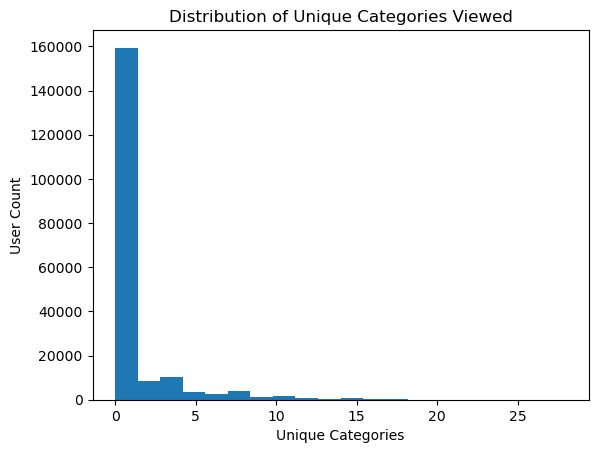

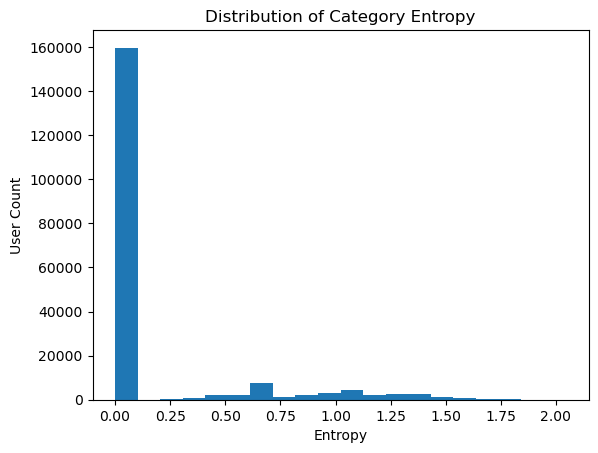

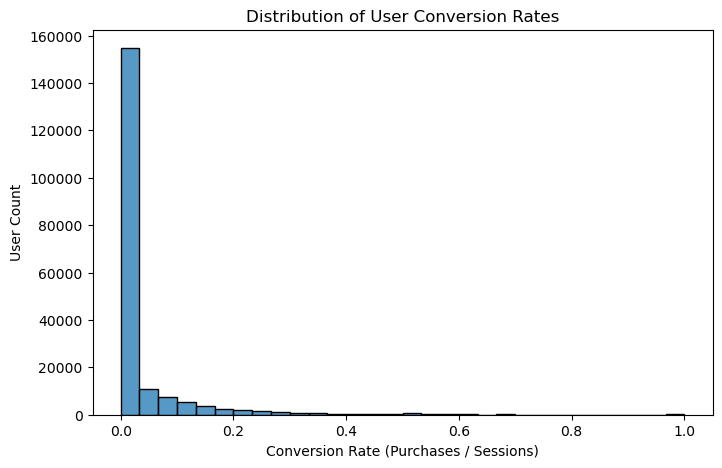

In [76]:
import matplotlib.pyplot as plt

plt.hist(behavior['unique_categories_viewed'], bins=20)
plt.title('Distribution of Unique Categories Viewed')
plt.xlabel('Unique Categories')
plt.ylabel('User Count')
plt.show()

plt.hist(behavior['category_entropy'], bins=20)
plt.title('Distribution of Category Entropy')
plt.xlabel('Entropy')
plt.ylabel('User Count')
plt.show()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=behavior, x='conversion_rate', bins=30)
plt.title('Distribution of User Conversion Rates')
plt.xlabel('Conversion Rate (Purchases / Sessions)')
plt.ylabel('User Count')
plt.show()


In [79]:
behavior['is_buyer'] = (behavior['unique_categories_viewed'] > 0).astype(int)

In [80]:
buyers = behavior[behavior['is_buyer'] == 1].copy()
non_buyers = behavior[behavior['is_buyer'] == 0].copy()

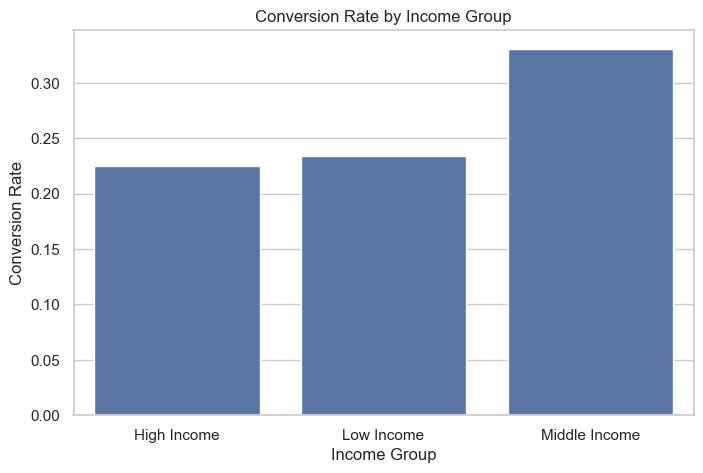

In [81]:
sns.set(style="whitegrid")

# Ensure category_entropy is numeric (if using real data)
buyers['category_entropy'] = pd.to_numeric(buyers['category_entropy'], errors='coerce')
buyers.dropna(subset=['category_entropy'], inplace=True)

# 1. Conversion Funnel Bar Plot
conversion_rates = behavior.groupby('income_group')['is_buyer'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=conversion_rates, x='income_group', y='is_buyer')
plt.title('Conversion Rate by Income Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Income Group')
plt.show()

# Insight: Lower-income users convert less → higher decision friction / cost sensitivity.

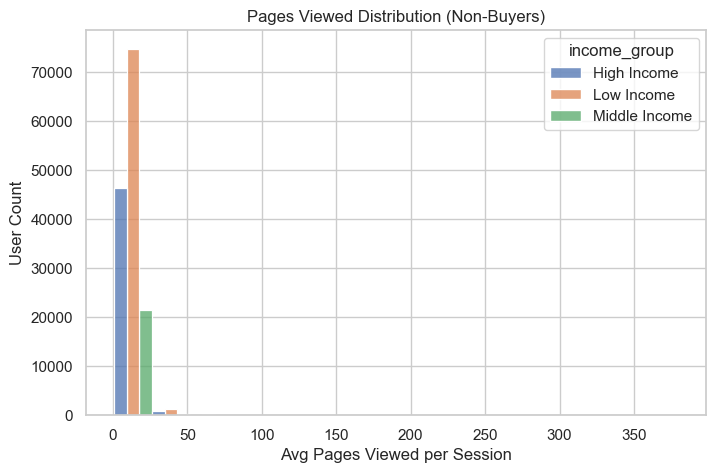

In [82]:
# 2. Pages Viewed Histogram (Non-Buyers)
plt.figure(figsize=(8, 5))
sns.histplot(data=non_buyers, x='avg_pages_viewed', hue='income_group', bins=15, kde=False, multiple="dodge")
plt.title('Pages Viewed Distribution (Non-Buyers)')
plt.xlabel('Avg Pages Viewed per Session')
plt.ylabel('User Count')
plt.show()

# Insight: Low-income non-buyers view fewer pages before bouncing → possible choice overload avoidance.

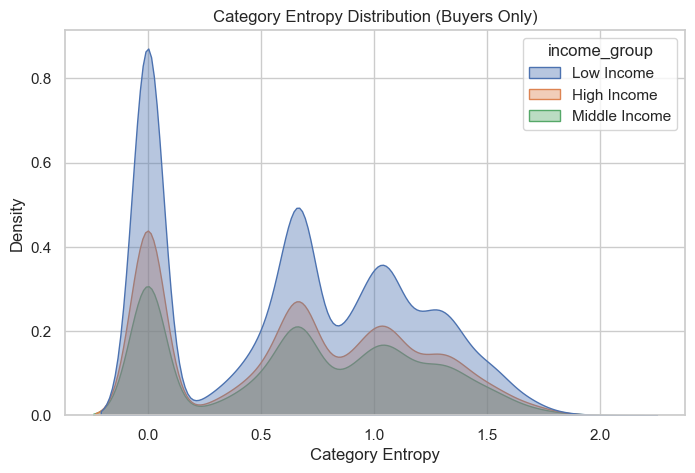

In [83]:
# 3. KDE Plot of Category Entropy (Buyers Only)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=buyers, x='category_entropy', hue='income_group', fill=True, alpha=0.4)
plt.title('Category Entropy Distribution (Buyers Only)')
plt.xlabel('Category Entropy')
plt.ylabel('Density')
plt.show()

# Insight: High-income buyers explore more categories → higher tolerance for choice complexity.

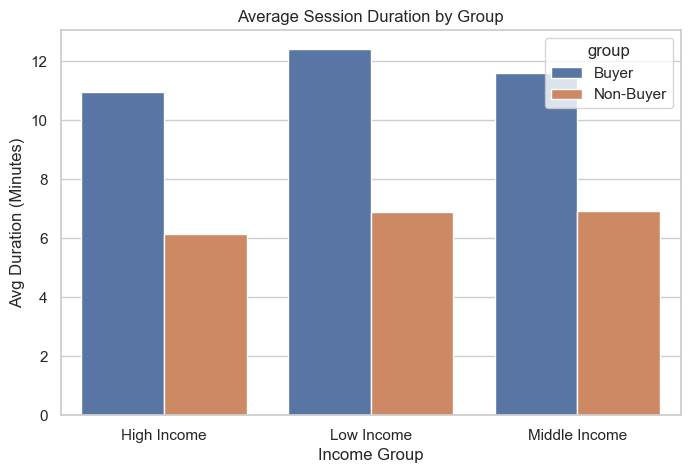

In [84]:
# 4. Avg Session Duration Bar Plot (Buyers vs Non-Buyers)
buyers['group'] = 'Buyer'
non_buyers['group'] = 'Non-Buyer'
combined = pd.concat([buyers, non_buyers])

avg_duration = combined.groupby(['group', 'income_group'])['avg_duration'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration, x='income_group', y='avg_duration', hue='group')
plt.title('Average Session Duration by Group')
plt.ylabel('Avg Duration (Minutes)')
plt.xlabel('Income Group')
plt.show()

# Insight: Non-buyers (especially low-income) spend less time before leaving → decision fatigue.